## 股票预测
主要是选择最佳购买策略使得盈利最高。

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### 1.数据观察

In [2]:
sp=pd.read_csv('./spy.csv',index_col='Date')


In [3]:
sp.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,148.25000,143.875000,148.25000,145.4375,8164300.0,98.959030
2000-01-04,144.06250,139.640625,143.53125,139.7500,8089800.0,95.089104
2000-01-05,141.53125,137.250000,139.93750,140.0000,12177900.0,95.259193
2000-01-06,141.50000,137.750000,139.62500,137.7500,6227200.0,93.728249
2000-01-07,145.75000,140.062500,140.31250,145.7500,8066500.0,99.171638


Text(0.5, 1.0, 'SPY')

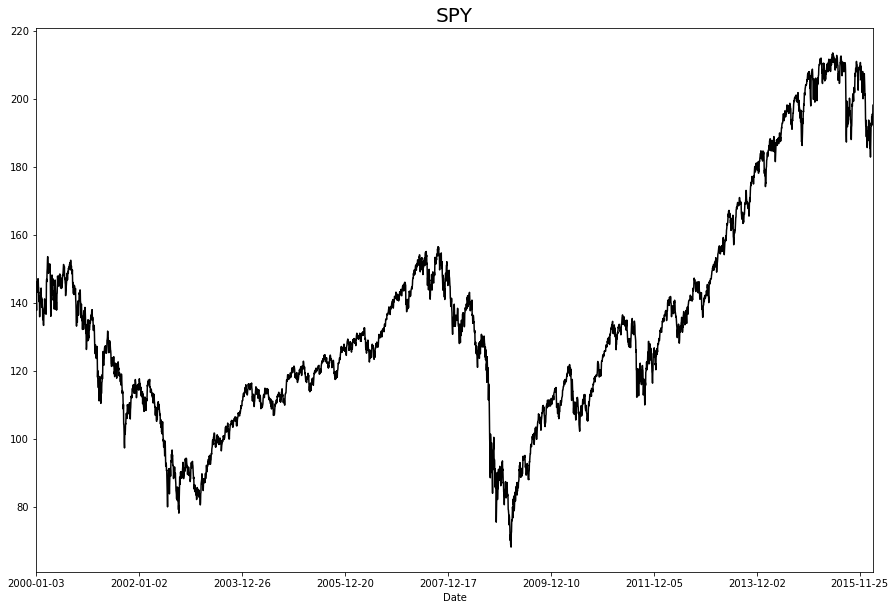

In [4]:
# 绘制收盘图像
fig, ax = plt.subplots(figsize=(15,10))
sp['Close'].plot(color='k')
plt.title("SPY", fontsize=20)

In [5]:
# 统计量生成
def get_stats(s, n=252):
    s = s.dropna()
    wins = len(s[s>0])
    losses = len(s[s<0])
    evens = len(s[s==0])
    mean_w = round(s[s>0].mean(), 3)
    mean_l = round(s[s<0].mean(), 3)
    win_r = round(wins/losses, 3)
    mean_trd = round(s.mean(), 3)
    sd = round(np.std(s), 3)
    max_l = round(s.min(), 3)
    max_w = round(s.max(), 3)
    sharpe_r = round((s.mean()/np.std(s))*np.sqrt(n), 4)
    cnt = len(s)
    print('交易次数:', cnt,\
          '\n盈利次数:', wins,\
          '\n亏损次数:', losses,\
          '\n盈亏平衡次数:', evens,\
          '\n盈利/亏损比例', win_r,\
          '\n盈利平均:', mean_w,\
          '\n亏损平均:', mean_l,\
          '\n平均收益:', mean_trd,\
          '\n标准差:', sd,\
          '\n最大亏损:', max_l,\
          '\n最大盈利:', max_w,\
          '\n夏普比率:', sharpe_r)

主要对比三种策略：
+ 每日回报（昨日收盘到今日收盘的价格变化）
+ 盘中回报（当日开盘到收盘的价格变化）
+ 隔夜回报（昨日收盘到今日开盘的价格变化）

（1）每日回报

In [6]:
long_day_rtn = ((sp['Close'] - sp['Close'].shift(1))/sp['Close'].shift(1))*100

In [7]:
(sp['Close'] - sp['Close'].shift(1)).sum()

52.67250061035159

In [8]:
get_stats(long_day_rtn)

交易次数: 4064 
盈利次数: 2168 
亏损次数: 1881 
盈亏平衡次数: 15 
盈利/亏损比例 1.153 
盈利平均: 0.819 
亏损平均: -0.91 
平均收益: 0.016 
标准差: 1.275 
最大亏损: -9.845 
最大盈利: 14.52 
夏普比率: 0.1958


主要观察平均收益、标准差、盈亏比例和夏普比率。夏普比率越高越好。

（2）盘中回报

In [9]:
long_id_rtn = ((sp['Close'] - sp['Open'])/sp['Open'])*100

In [10]:
(sp['Close'] - sp['Open']).sum()

-36.91032409667949

In [11]:
get_stats(long_id_rtn)

交易次数: 4065 
盈利次数: 2128 
亏损次数: 1908 
盈亏平衡次数: 29 
盈利/亏损比例 1.115 
盈利平均: 0.686 
亏损平均: -0.766 
平均收益: -0.0 
标准差: 1.052 
最大亏损: -8.991 
最大盈利: 8.435 
夏普比率: -0.0063


（3）隔夜回报

In [12]:
long_on_rtn = ((sp['Open'] - sp['Close'].shift(1))/sp['Close'].shift(1))*100

In [13]:
(sp['Open'] - sp['Close'].shift(1)).sum()

86.77032470703108

In [14]:
get_stats(long_on_rtn)

交易次数: 4064 
盈利次数: 2152 
亏损次数: 1878 
盈亏平衡次数: 34 
盈利/亏损比例 1.146 
盈利平均: 0.436 
亏损平均: -0.466 
平均收益: 0.016 
标准差: 0.696 
最大亏损: -8.322 
最大盈利: 6.068 
夏普比率: 0.3541


## 2.回归模型构建
使用当天及前20天的收盘价预测下一天的收盘价。



In [15]:
# 前20天的收盘价
for i in range(1,21,1):
    sp.loc[:,'Close Minus '+str(i)]=sp['Close'].shift(i)


In [16]:
# 提取出这21天的收盘价，并且由于shift导致前20个样本有缺失值，故舍弃前20个样本
sp20=sp[[x for x in sp.columns if 'Close Minus' in x or x == 'Close']].iloc[20:,:]

In [17]:
# 日期按顺序排列
sp20=sp20.iloc[:,::-1]

In [18]:
sp20.head(5)

,Close Minus 20,Close Minus 19,Close Minus 18,Close Minus 17,Close Minus 16,Close Minus 15,Close Minus 14,Close Minus 13,Close Minus 12,Close Minus 11,...,Close Minus 9,Close Minus 8,Close Minus 7,Close Minus 6,Close Minus 5,Close Minus 4,Close Minus 3,Close Minus 2,Close Minus 1,Close
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,145.4375,139.75,140.00,137.7500,145.7500,146.25000,144.50000,143.06250,145.00000,146.96875,...,147.00000,144.75000,144.43750,140.34375,141.9375,140.8125,140.2500,135.8750,139.56250,140.93750
2000-02-02,139.7500,140.00,137.75,145.7500,146.2500,144.50000,143.06250,145.00000,146.96875,145.81250,...,144.75000,144.43750,140.34375,141.93750,140.8125,140.2500,135.8750,139.5625,140.93750,141.06250
2000-02-03,140.0000,137.75,145.75,146.2500,144.5000,143.06250,145.00000,146.96875,145.81250,147.00000,...,144.43750,140.34375,141.93750,140.81250,140.2500,135.8750,139.5625,140.9375,141.06250,143.18750
2000-02-04,137.7500,145.75,146.25,144.5000,143.0625,145.00000,146.96875,145.81250,147.00000,144.75000,...,140.34375,141.93750,140.81250,140.25000,135.8750,139.5625,140.9375,141.0625,143.18750,142.59375
2000-02-07,145.7500,146.25,144.50,143.0625,145.0000,146.96875,145.81250,147.00000,144.75000,144.43750,...,141.93750,140.81250,140.25000,135.87500,139.5625,140.9375,141.0625,143.1875,142.59375,142.37500


模型采用支持向量回归模型

In [19]:
from sklearn.svm import SVR

In [20]:
clf = SVR(kernel='linear')


In [21]:
x_train=sp20[:-2000]
y_train=sp20['Close'].shift(-1)[:-2000]

x_test=sp20[-2000:-1000]
y_test=sp20['Close'].shift(-1)[-2000:-1000]


In [22]:
clf.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
pred=clf.predict(x_test)

### 3.回归预测结果分析

In [24]:
tf=pd.DataFrame(list(zip(y_test,pred)),columns=['Next Day Close', 'Predicted Next Close'],index=y_test.index)

In [25]:
tf.head(5)

,Next Day Close,Predicted Next Close
Date,,
2008-03-24,134.850006,134.172792
2008-03-25,133.199997,134.348203
2008-03-26,132.779999,133.104579
2008-03-27,131.509995,133.481531
2008-03-28,131.970001,132.040308


In [26]:
tf1=pd.merge(tf,sp[['Close']].iloc[-2000:-1000],left_index=True,right_index=True)
tf2=pd.merge(tf1,sp[['Open']].shift(-1).iloc[-2000:-1000],left_index=True,right_index=True)
tf2.columns=['Next Day Close', 'Predicted Next Close', 'Current Day Close', 'Next Day Open']


In [27]:
tf2.tail(5)

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open
Date,,,,
2012-03-02,136.750000,137.206666,137.309998,137.100006
2012-03-05,134.750000,136.907010,136.750000,135.350006
2012-03-06,135.690002,135.060935,134.750000,135.059998
2012-03-07,137.039993,135.814985,135.690002,136.520004
2012-03-08,137.570007,136.931897,137.039993,137.300003


四列特征分别是：下一天收盘价、下一天预测收盘价、当天收盘价、下一天开盘价。

In [28]:
def get_signal(r):
    if r['Predicted Next Close'] > r['Next Day Open'] + 1:
        return 0
    else:
        return 1

理论上当预测收盘价高于实际开盘价时进行购买，但是效果不好，且更糟：  
+ 改进之一：预测收盘价高于实际开盘价一定程度才可购买，这里设为1
+ 改进之二：效果很糟，模型起反向作用，故设计当预测收盘价高于实际开盘价时**不购买** 


In [29]:
# 统计增长百分比
def get_ret(r):
    if r['Signal'] == 1:
        return ((r['Next Day Close'] - r['Next Day Open'])/r['Next Day Open']) * 100
    else:
        return 0

In [30]:
tf2 = tf2.assign(Signal = tf2.apply(get_signal, axis=1))
tf2 = tf2.assign(PnL = tf2.apply(get_ret, axis=1))

In [31]:
tf2.head(5)

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open,Signal,PnL
Date,,,,,,
2008-03-24,134.850006,134.172792,134.720001,134.860001,1,-0.007411
2008-03-25,133.199997,134.348203,134.850006,134.460007,1,-0.937089
2008-03-26,132.779999,133.104579,133.199997,134.199997,1,-1.058121
2008-03-27,131.509995,133.481531,132.779999,132.990005,1,-1.112874
2008-03-28,131.970001,132.040308,131.509995,131.289993,1,0.517943


In [32]:
(tf2[tf2['Signal']==1]['Next Day Close'] - tf2[tf2['Signal']==1]['Next Day Open']).sum()

29.530029296875185

In [33]:
(sp['Close'].iloc[-2000:-1000] - sp['Open'].iloc[-2000:-1000]).sum()

-7.090003967285199

In [34]:
get_stats((sp['Close'].iloc[-2000:-1000] - sp['Open'].iloc[-2000:-1000])/sp['Open'].iloc[-2000:-1000] * 100)

交易次数: 1000 
盈利次数: 532 
亏损次数: 459 
盈亏平衡次数: 9 
盈利/亏损比例 1.159 
盈利平均: 0.851 
亏损平均: -0.975 
平均收益: 0.005 
标准差: 1.366 
最大亏损: -8.991 
最大盈利: 7.968 
夏普比率: 0.0581


In [35]:
get_stats(tf2['PnL'])

交易次数: 1000 
盈利次数: 474 
亏损次数: 386 
盈亏平衡次数: 140 
盈利/亏损比例 1.228 
盈利平均: 0.769 
亏损平均: -0.843 
平均收益: 0.039 
标准差: 1.111 
最大亏损: -8.991 
最大盈利: 7.968 
夏普比率: 0.5554


对比盈利信息，可以发现我们的策略比原始好很多。

### 4.建模与动态时间扭曲

度量两个时间序列的相似性，根据正向盈利曲线进行购买

In [36]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

# DTW算法度量两个时间序列的相似性
def dtw_dist(x, y):
    distance, path = fastdtw(x, y, dist=euclidean)
    return distance

In [37]:
# 将16年数据划分成多个区间，每个区间长度为5
tseries = []
tlen = 5
for i in range(tlen, len(sp), tlen):
    pctc = sp['Close'].iloc[i-tlen:i].pct_change()[1:].values * 100
    res = sp['Close'].iloc[i-tlen:i+1].pct_change()[-1] * 100
    tseries.append((pctc, res))

In [38]:
len(tseries)

812

In [39]:
tseries[0]

(array([-3.91061453,  0.17889088, -1.60714286,  5.8076225 ]),
 0.34305317324185847)

In [40]:
# 度量序列两两之间距离
dist_pairs = []
for i in range(len(tseries)):
    for j in range(len(tseries)):
        dist = dtw_dist(tseries[i][0], tseries[j][0])
        dist_pairs.append((i,j,dist,tseries[i][1], tseries[j][1]))

In [41]:
dist_frame = pd.DataFrame(dist_pairs, columns=['A','B','Dist', 'A Ret', 'B Ret'])

In [42]:
# 删除距离为0的相同序列，并对A/B日期进行排序。，
sf = dist_frame[dist_frame['Dist']>0].sort_values(['A','B']).reset_index(drop=1)

In [43]:
# 选择A日期小于B日期的样本 （由过去选择未来）
sfe = sf[sf['A']<sf['B']]

In [44]:
# 选择距离小于1且A第一个序列回报为正的序列
winf = sfe[(sfe['Dist']<=1)&(sfe['A Ret']>0)]

In [45]:
winf

,A,B,Dist,A Ret,B Ret
3312,4,69,0.778630,1.360843,-1.696072
3439,4,196,0.608312,1.360843,0.410596
3609,4,366,0.973128,1.360843,0.040522
3790,4,547,0.832545,1.360843,-1.447712
3891,4,648,0.548848,1.360843,-0.510458
4035,4,792,0.719196,1.360843,0.819056
5463,6,598,0.678194,1.180829,2.896685
5489,6,624,0.897031,1.180829,0.757222
7769,9,471,0.932581,2.333028,-0.212983
13002,16,27,0.849543,0.754885,-0.571308


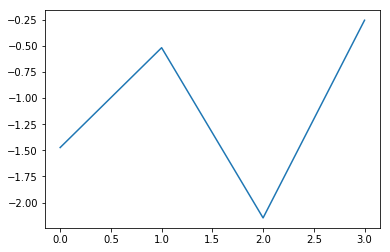

In [46]:
plt.plot(np.arange(4), tseries[6][0])

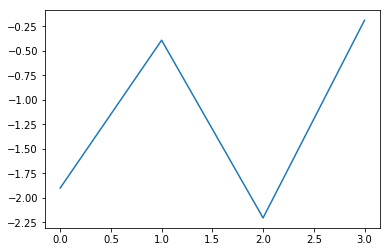

In [47]:
plt.plot(np.arange(4), tseries[598][0])

对于相似的历史曲线，只要能返回正向的盈利，我们就会买入。如果发生无法盈利的情况，我们将删除它们。
如果前四点相似，且A第五点有正向收益，则预测B第五点也**可能**会有正向收益。

In [48]:
# 因为A/B都已经排序了，故当A对应的B购买完之后，若B有亏损现象时，则不使用该A点。
# 随着时间推移，更新选择的A点。
excluded = {}
return_list = []
def get_returns(r):
    if excluded.get(r['A']) is None:
        return_list.append(r['B Ret'])
        # 注意顺序：无论亏损都是先购买B，然后在根据亏损与否更新A点选择
        if r['B Ret'] < 0:
            excluded.update({r['A']:1})

In [49]:
winf.apply(get_returns, axis=1);

In [50]:
get_stats(pd.Series(return_list))

交易次数: 569 
盈利次数: 352 
亏损次数: 217 
盈亏平衡次数: 0 
盈利/亏损比例 1.622 
盈利平均: 0.572 
亏损平均: -0.646 
平均收益: 0.108 
标准差: 0.818 
最大亏损: -2.999 
最大盈利: 3.454 
夏普比率: 2.0877


根据以上统计信息，可以发现该策略由于回归策略。
